# Lista 3

## Algorytm K-means

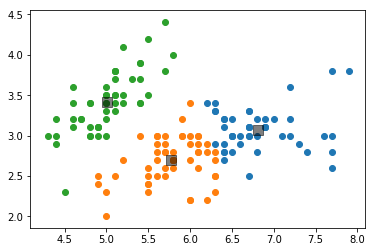

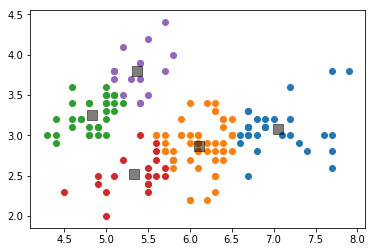

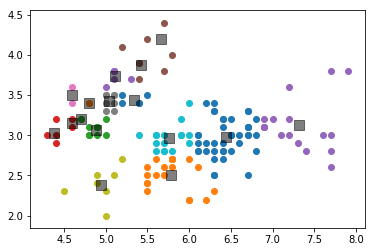

In [41]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import time

iris = datasets.load_iris()


class Kmeans:
    def __init__(self, vectors, n):           #n - liczba klastrow
        self.n = n
        self.shape = vectors.shape
        self.length = self.shape[0]
        self.vectors = vectors
        self.centers = np.array(vectors[0:n])
        self.clusters = [[] for i in range(self.n)]
        self.old_centers = []

    @staticmethod
    def distance(a):  # a - value
        return a

    def new_centers(self):
        self.old_centers = self.centers
        self.clusters = [cluster for cluster in self.clusters if len(cluster) != 0]
        self.n = len(self.clusters)

        self.centers = np.array([np.mean(cluster, axis=0) for cluster in self.clusters])

    def k_means(self):
        change = True
        sq1_sums = np.array([np.sum(self.vectors ** 2, axis=1)])
        while change is True:

            sq2_sums = np.array([np.sum(self.centers ** 2, axis=1)])
            mult = np.array(-2 * self.vectors.dot(np.transpose(self.centers)))
            distances = np.array(np.transpose(sq1_sums) + sq2_sums + mult)
            which_cluster = np.argmin(distances, axis=1)

            self.clusters = [[] for i in range(self.n)]
            for index in range(self.length):
                self.clusters[which_cluster[index]].append(self.vectors[index])

            change = False
            if np.array_equal(self.old_centers, self.centers) is False:
                 change = True

            self.new_centers()

        return self.clusters

    def plots(self, dim=2):
        for cluster in self.clusters:
            x = [vector[0] for vector in cluster]
            y = [vector[1] for vector in cluster]
            x_centers = [center[0] for center in self.centers]
            y_centers = [center[1] for center in self.centers]
            if dim == 3:
                z = [vector[2] for vector in cluster]
                z_centers = [center[c] for center in self.centers]
                plt.scatter(x, y, z)
            else:
                plt.scatter(x, y)

        if dim == 3:
            plt.scatter(x_centers, y_centers, z_centers, alpha=0.5, color="black", s=100, marker="s")
            plt.show()
        else:
            plt.scatter(x_centers, y_centers, alpha=0.5, color="black", s=100, marker="s")
            plt.show()

if __name__ == "__main__":
    vectors = np.array([[row[0], row[1]] for row in iris.data])
    alg = Kmeans(vectors, 3)
    alg.k_means()
    alg.plots()
    alg = Kmeans(vectors, 5)
    alg.k_means()
    alg.plots()
    alg = Kmeans(vectors, 17)
    alg.k_means()
    alg.plots()

## 1000gauss

In [1]:
from kmeans import Kmeans
import numpy as np

class RandomGauss:
    def __init__(self, q):
        self.q = q
        self.data = np.array([])
        self.vectors = np.array([])

    def init_distros(self):
        for index in range(1000):
            self.data = np.concatenate([self.data, np.random.normal(self.q*index, 5, 1000)])

    def init_vectors(self):
        self.init_distros()
        self.vectors = np.array([[np.random.choice(self.data) for index in range(1000)]])

        for index in range(999):
            self.vectors = np.vstack((self.vectors, np.array([np.random.choice(self.data) for i in range(1000)])))


if __name__ == "__main__":
    random_gauss = RandomGauss(10)
    random_gauss.init_vectors()
    kmeans = Kmeans(random_gauss.vectors, 3)
    kmeans.k_means()
    print([len(cluster) for cluster in kmeans.clusters])
    kmeans = Kmeans(random_gauss.vectors, 10)
    kmeans.k_means()
    print([len(cluster) for cluster in kmeans.clusters])
    kmeans = Kmeans(random_gauss.vectors, 100)
    kmeans.k_means()
    print([len(cluster) for cluster in kmeans.clusters])
    random_gauss = RandomGauss(20)
    random_gauss.init_vectors()
    kmeans = Kmeans(random_gauss.vectors, 3)
    kmeans.k_means()
    print([len(cluster) for cluster in kmeans.clusters])
    kmeans = Kmeans(random_gauss.vectors, 10)
    kmeans.k_means()
    print([len(cluster) for cluster in kmeans.clusters])
    kmeans = Kmeans(random_gauss.vectors, 100)
    kmeans.k_means()
    print([len(cluster) for cluster in kmeans.clusters])

[85, 206, 709]
[12, 29, 244, 107, 14, 69, 18, 202, 108, 197]
[1, 3, 24, 8, 1, 6, 1, 28, 7, 27, 39, 19, 1, 7, 18, 5, 2, 2, 10, 2, 47, 32, 7, 4, 7, 14, 5, 6, 3, 2, 2, 9, 23, 12, 1, 13, 7, 1, 5, 2, 15, 26, 6, 6, 14, 3, 2, 2, 1, 5, 15, 9, 10, 2, 4, 5, 1, 4, 29, 15, 29, 2, 10, 9, 8, 4, 7, 2, 8, 17, 10, 3, 10, 2, 5, 6, 6, 25, 16, 16, 11, 7, 29, 21, 3, 5, 3, 2, 8, 16, 5, 2, 10, 42, 4, 22, 1, 1, 16, 10]
[343, 335, 322]
[54, 69, 62, 247, 62, 30, 28, 116, 308, 24]
[2, 5, 2, 22, 4, 3, 2, 4, 41, 2, 9, 10, 2, 1, 7, 4, 11, 2, 11, 23, 4, 19, 33, 1, 8, 21, 43, 1, 8, 27, 50, 15, 9, 38, 5, 6, 1, 3, 2, 11, 9, 1, 7, 6, 6, 3, 2, 3, 9, 11, 1, 3, 6, 11, 1, 17, 2, 21, 12, 5, 13, 5, 2, 13, 1, 12, 5, 2, 8, 16, 28, 5, 1, 11, 23, 3, 9, 61, 6, 3, 11, 1, 3, 5, 36, 10, 7, 4, 4, 4, 4, 7, 5, 4, 18, 2, 1, 4, 3, 32]


## 5 datasets

real: [59, 71, 48]
k_means: [49, 102, 27]
k_means for 2 coordinates: [65, 63, 50]


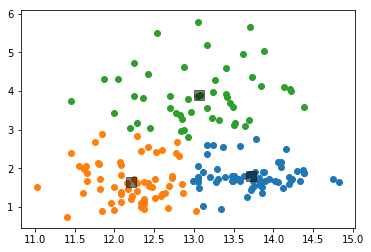

real: [2, 1, 1, 2, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 3, 4, 2, 2, 5, 2, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 1, 3, 1, 2, 5, 1, 1, 3, 2, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 1, 1, 5, 1, 1, 1, 3, 2, 3, 4, 2, 3, 2, 4, 2, 4, 2, 5, 6, 4, 5, 2, 3, 4, 5, 5, 2, 4, 4, 3, 6, 2, 3, 2, 3, 2, 5, 5, 2, 2, 7, 2, 3, 7, 1, 5, 2, 2, 3, 5, 2, 4, 4, 4, 7, 4, 4, 2, 1, 2, 4, 4, 5, 2, 3, 1, 3, 4, 3, 2, 3, 4, 8, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 4, 2, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16]
k_means: [2, 1, 1, 4, 3, 4, 2, 2, 1, 2, 1, 1, 2, 3, 1, 4, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 5, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3, 1, 1, 2, 83, 1, 3, 1, 4, 3, 1, 1, 2, 3, 9, 4, 1, 8, 4, 4, 2, 1, 1, 3, 1, 3, 1, 2, 1, 2, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 2, 3, 6, 1, 1, 1, 

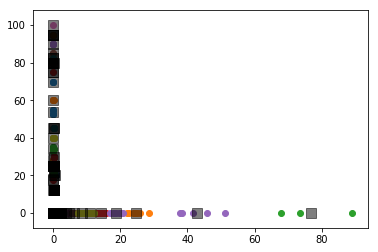

real: [50, 50, 50]
k_means: [39, 61, 50]
k_means for 2 coordinates: [47, 53, 50]


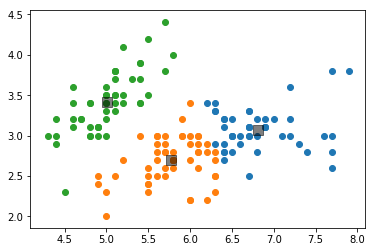

real: [1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 4, 4, 1, 4, 1, 1, 4, 3, 2, 4, 3, 4, 2, 2, 3, 3, 2, 5, 6, 1, 2, 2, 4, 3, 1, 1, 2, 3, 4, 4, 1, 2, 4, 2, 5, 4, 2, 2, 3, 2, 4, 4, 1, 2, 1, 3, 3, 2, 4, 2, 1, 4, 2, 3, 3, 1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 4, 3, 4, 2, 2, 2, 1, 2, 2, 2, 2, 3, 4, 2, 4, 1, 1, 1, 1, 4, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 3, 1, 2, 2, 2, 1, 1, 5, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 6, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 4, 1, 1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2, 1, 3, 2, 2, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1]
k_means: [1, 2, 2, 2, 2, 1, 3, 1, 2, 1, 1, 1, 2, 3, 1, 2, 2, 2, 3, 2, 2, 5, 2, 4, 2, 2, 1, 1, 1, 1, 1, 3, 1, 4, 2, 1, 1, 1, 2, 2, 3, 1, 3, 2, 1, 4, 2, 3, 2, 1, 2, 3, 2, 2, 2, 1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 2, 3, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1, 3, 3, 2, 3, 2, 2, 2, 1, 1, 1, 5, 6, 3, 1, 1, 2, 3, 1, 4, 1, 4, 3, 1, 2, 1, 2, 1, 3, 2, 4, 1, 2, 2, 2,

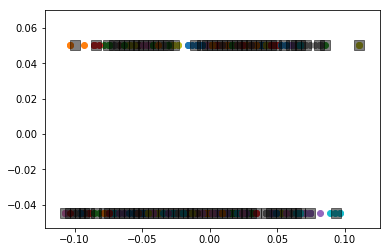

real: [212, 357]
k_means: [438, 131]
k_means for 2 coordinates: [340, 229]


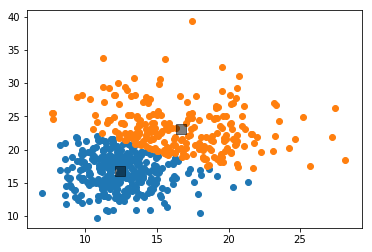

In [4]:
from sklearn import datasets
from kmeans import Kmeans
import numpy as np


class AnalyzeData:
    def __init__(self, dataset):
        self.dataset = dataset

    def analyze(self):
        print("real: " + str([self.dataset.target.tolist().count(element)
                              for element in np.unique([self.dataset.target])]))

        all_coordinates = Kmeans(self.dataset.data, np.unique(self.dataset.target).size)
        all_coordinates.k_means()
        print("k_means: " + str([len(cluster) for cluster in all_coordinates.clusters]))

        coordinates_for_plot = np.array([[row[0], row[1]] for row in self.dataset.data])
        two_coordinates = Kmeans(coordinates_for_plot, np.unique(self.dataset.target).size)
        two_coordinates.k_means()
        print("k_means for 2 coordinates: " + str([len(cluster) for cluster in two_coordinates.clusters]))
        two_coordinates.plots()


if __name__ == "__main__":
    wines = datasets.load_wine()
    analyze_wines = AnalyzeData(wines)
    analyze_wines.analyze()

    boston = datasets.load_boston()
    analyze_boston = AnalyzeData(boston)
    analyze_boston.analyze()

    iris = datasets.load_iris()
    analyze_iris = AnalyzeData(iris)
    analyze_iris.analyze()
    
    diabetes = datasets.load_diabetes()
    analyze_diabetes = AnalyzeData(diabetes)
    analyze_diabetes.analyze()
    
    breast_cancer = datasets.load_breast_cancer()
    analyze_breast_cancer = AnalyzeData(breast_cancer)
    analyze_breast_cancer.analyze()

## Photo

21.56050498300465


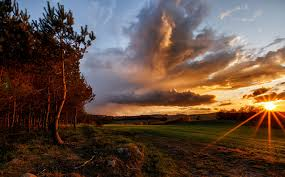

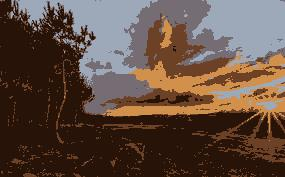

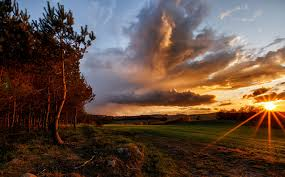

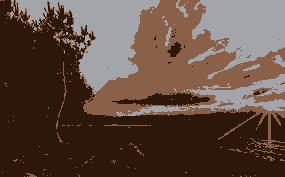

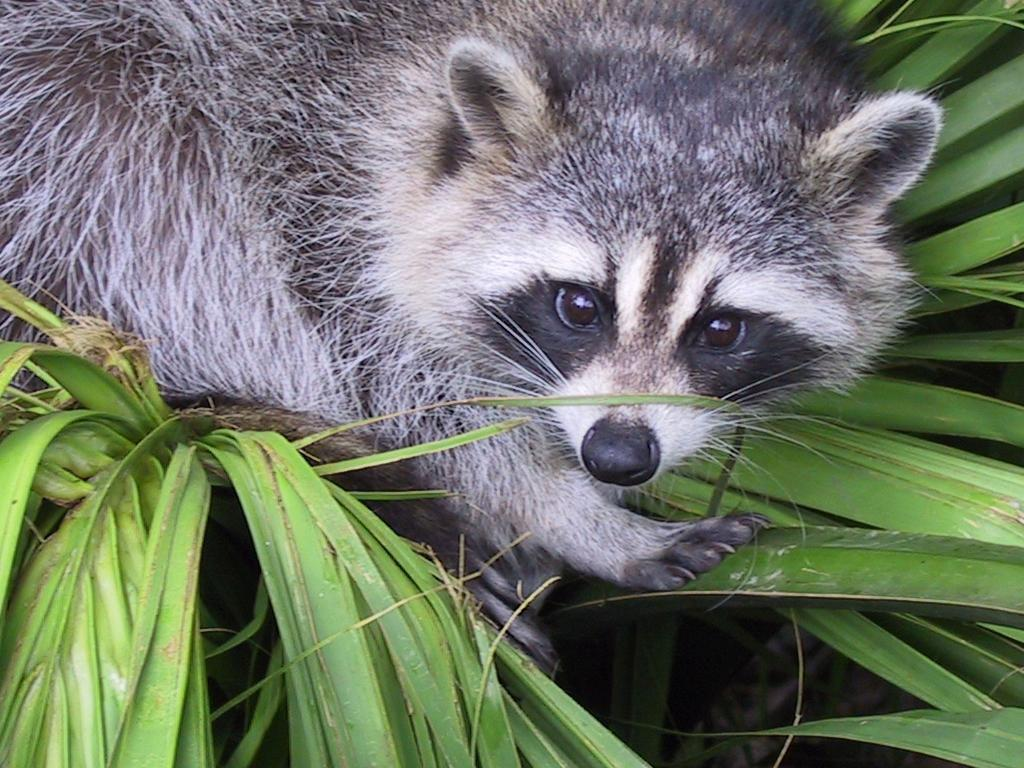

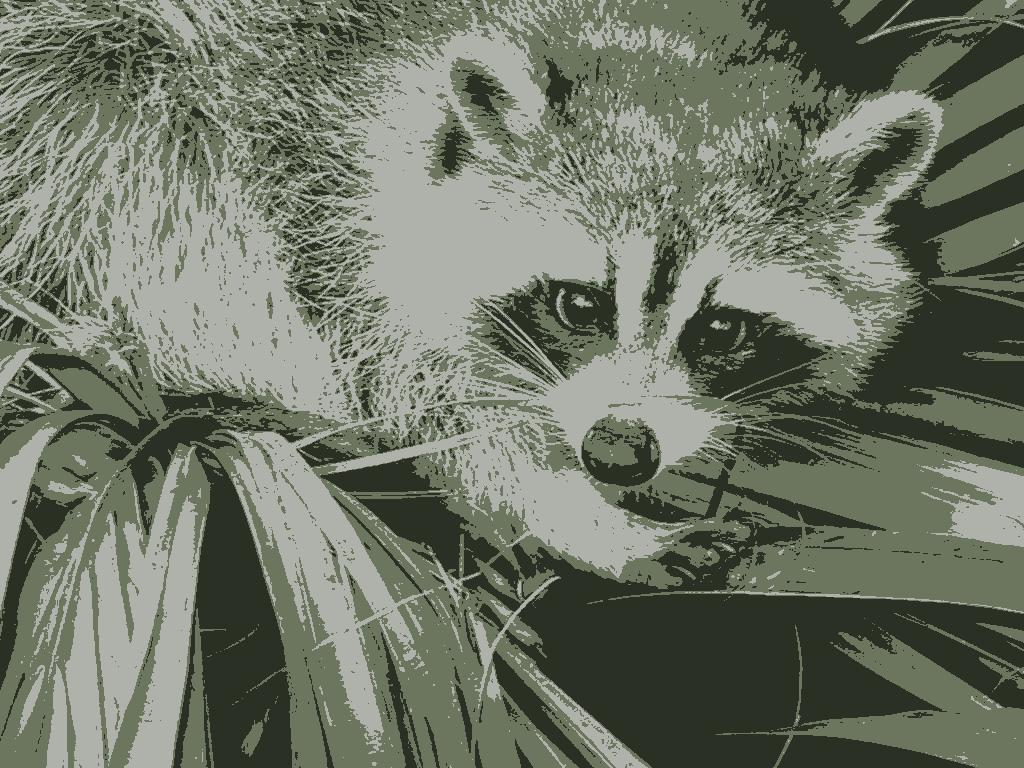

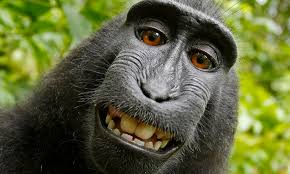

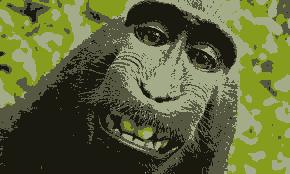

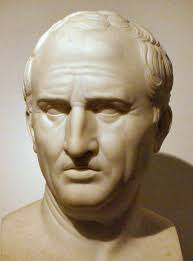

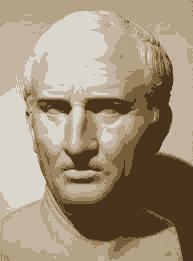

In [38]:
import numpy as np
from kmeans import Kmeans
from scipy import misc
import matplotlib.pyplot as plt
from IPython.display import Image, display
import time

class Photo:
    def __init__(self):
        self.images = []

    def color_reduction(self, image, k):
        img = misc.imread(image)
        img_length  = img.shape[0]
        img_width = img.shape[1]
        self.images.append(str(image))

        pixels = img.reshape(-1, 3)
        colors = Kmeans(pixels, k)
        clusters = colors.k_means()
        new_colors = colors.centers

        pantone = {}
        for cluster_index in range(colors.n):
            for pixel in clusters[cluster_index]:
                pantone[tuple(pixel)] = new_colors[cluster_index]

        length = pixels.shape[0]

        for index in range(length):
            pixels[index] = pantone[tuple(pixels[index])]
            
        img = pixels.reshape(img_length, img_width, 3) 

        misc.imsave('new' + str(image), img)
        self.images.append('new' + str(image))
    

if __name__ == "__main__":
    photos = Photo()
    photos.color_reduction('landscape.jpg', 5)
    photos.color_reduction('landscape2.jpg', 3)
    misc.imsave('face.jpg', misc.face())
    tp = time.perf_counter()
    photos.color_reduction('face.jpg', 50)
    tk = time.perf_counter()
    print(tk -tp)
    photos.color_reduction('gorilla.jpg', 4)
    photos.color_reduction('cycero.jpg', 10)
    
    
    for imageName in photos.images:
        display(Image(filename=imageName))
